In [18]:
import cv2
import csv
import glob

header = ["label"]
for i in range(0, 784):
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dirList = glob.glob("DataSet/"+str(label)+"/*.jpg")
    
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi = cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows,cols = roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k =1
                else:
                    k =0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

In [19]:
import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
712,5,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1056,7,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
619,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,5,0,0,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,5,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
233,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X = data.drop(["label"], axis=1)
Y = data["label"]

7


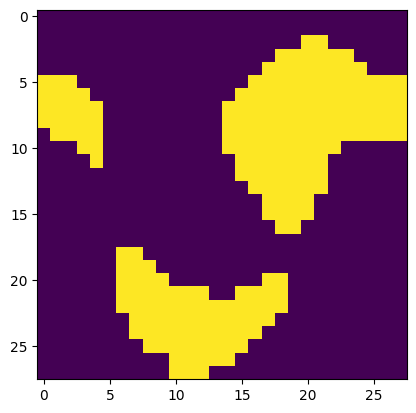

In [21]:
import matplotlib.pyplot as plt
import cv2
idx = 999
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [23]:
import joblib 
from sklearn.svm import SVC
classifier =SVC(kernel="linear", random_state=7)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "Model/Amharic")

['Model/Amharic']

In [24]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy =", metrics.accuracy_score(prediction, test_y))

Accuracy = 0.8201754385964912


In [1]:
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("Model/Amharic")
image_folder="img/"
 
while True:
#    img=ImageGrab.grab(bbox=(60,70,400,500)) 
   # img.save(images_folder+"img.png")
   im = cv2.imread(image_folder+"ha.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ## Add pixel one by one into data array
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
           
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

/home/kal/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


KeyboardInterrupt: 